In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import logging

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset']
    test_labels = tmp_save['labels']
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (31402, 56, 56) (31402,)
Validation set (2000, 56, 56) (2000,)
Test set (13068, 56, 56) (13068,)


In [5]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (30041, 56, 56) (30041,)
Validation set (1917, 56, 56) (1917,)
Test set (12920, 56, 56) (12920,)


Labels [5 8]
Dtype float32
Shape (56, 56)
Color range -0.471941 0.5


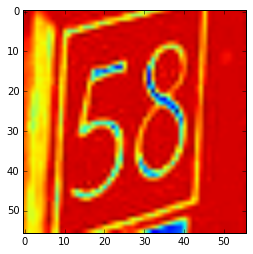

Labels [2 4]
Dtype float32
Shape (56, 56)
Color range -0.49993 0.5


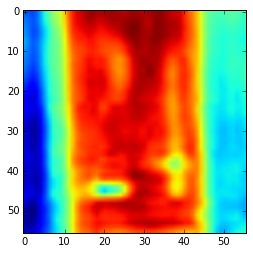

Labels [3 7 9]
Dtype float32
Shape (56, 56)
Color range -0.527838 0.5


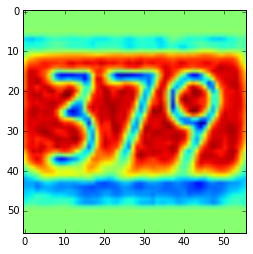

Labels [1 1 2]
Dtype float32
Shape (56, 56)
Color range -0.510316 0.5


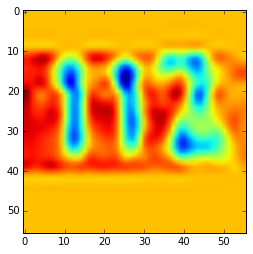

Labels [1 5]
Dtype float32
Shape (56, 56)
Color range -0.501435 0.5


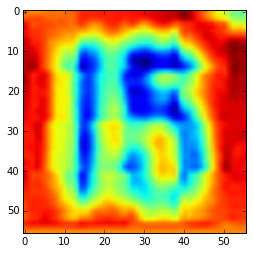

Labels [4 1]
Dtype float32
Shape (56, 56)
Color range -0.498366 0.5


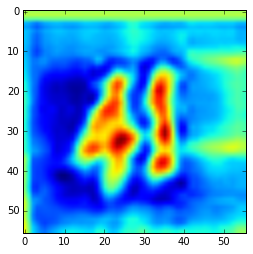

In [6]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [7]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (30041, 56, 56, 1) (30041, 3, 11)
Validation set (1917, 56, 56, 1) (1917, 3, 11)
Test set (12920, 56, 56, 1) (12920, 3, 11)


In [8]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (30041, 28, 28, 1) (30041, 3, 11)
Validation set (1917, 28, 28, 1) (1917, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [9]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [30]:
train_dataset, valid_dataset, test_dataset = dataset_28

def run(graph_config):
    graph = create_graph(num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, num_digits, train_dataset, train_labels, valid_labels, test_labels, mins=5)
    return graph

In [11]:
graph = run({})

Initialized
Elapsed time(s):13/300 (0.04%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.880306
Minibatch accuracy: 31.2%
Validation accuracy: 40.5%
Elapsed time(s):28/300 (0.09%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.871888
Minibatch accuracy: 41.7%
Validation accuracy: 44.3%
Elapsed time(s):42/300 (0.14%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.354751
Minibatch accuracy: 66.7%
Validation accuracy: 48.4%
Elapsed time(s):59/300 (0.20%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.435794
Minibatch accuracy: 58.3%
Validation accuracy: 51.5%
Elapsed time(s):74/300 (0.25%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.114795
Minibatch accuracy: 68.8%
Validation accuracy: 54.0%
Elapsed time(s):89/300 (0.30%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.099073
Minibatch accuracy: 75.0%
Validation accuracy: 56.1%
Elapsed time(s):103/300 (0.35%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.263319
Minibatch acc

In [12]:
graph = run({'use_dropout':True})

Initialized
Elapsed time(s):11/300 (0.04%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.871933
Minibatch accuracy: 35.4%
Validation accuracy: 41.9%
Elapsed time(s):26/300 (0.09%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.866789
Minibatch accuracy: 37.5%
Validation accuracy: 45.0%
Elapsed time(s):40/300 (0.14%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.494022
Minibatch accuracy: 56.2%
Validation accuracy: 49.2%
Elapsed time(s):55/300 (0.18%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.343358
Minibatch accuracy: 64.6%
Validation accuracy: 51.8%
Elapsed time(s):69/300 (0.23%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.073156
Minibatch accuracy: 68.8%
Validation accuracy: 55.2%
Elapsed time(s):84/300 (0.28%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.073978
Minibatch accuracy: 75.0%
Validation accuracy: 57.7%
Elapsed time(s):98/300 (0.33%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.255007
Minibatch accu

In [13]:
graph = run({'use_dropout':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):12/300 (0.04%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.819139
Minibatch accuracy: 47.9%
Validation accuracy: 45.4%
Elapsed time(s):26/300 (0.09%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.766122
Minibatch accuracy: 52.1%
Validation accuracy: 48.2%
Elapsed time(s):41/300 (0.14%)
Learning rate: 0.496131
Minibatch loss at step 1500: 1.390255
Minibatch accuracy: 68.8%
Validation accuracy: 52.8%
Elapsed time(s):56/300 (0.19%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.534305
Minibatch accuracy: 62.5%
Validation accuracy: 51.6%
Elapsed time(s):70/300 (0.24%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.970223
Minibatch accuracy: 81.2%
Validation accuracy: 56.7%
Elapsed time(s):85/300 (0.28%)
Learning rate: 0.492295
Minibatch loss at step 3000: 1.152867
Minibatch accuracy: 79.2%
Validation accuracy: 56.9%
Elapsed time(s):99/300 (0.33%)
Learning rate: 0.491022
Minibatch loss at step 3500: 1.364297
Minibatch accuracy: 7

In [14]:
graph = run({'use_dropout':True,
             'learning_decay':0.2})

Initialized
Elapsed time(s):11/300 (0.04%)
Learning rate: 0.0495985
Minibatch loss at step 500: 1.963489
Minibatch accuracy: 35.4%
Validation accuracy: 40.9%
Elapsed time(s):26/300 (0.09%)
Learning rate: 0.0492009
Minibatch loss at step 1000: 1.893155
Minibatch accuracy: 35.4%
Validation accuracy: 43.9%
Elapsed time(s):40/300 (0.14%)
Learning rate: 0.0488066
Minibatch loss at step 1500: 1.478388
Minibatch accuracy: 52.1%
Validation accuracy: 48.0%
Elapsed time(s):55/300 (0.18%)
Learning rate: 0.0484154
Minibatch loss at step 2000: 1.488337
Minibatch accuracy: 56.2%
Validation accuracy: 51.4%
Elapsed time(s):69/300 (0.23%)
Learning rate: 0.0480274
Minibatch loss at step 2500: 1.119247
Minibatch accuracy: 68.8%
Validation accuracy: 54.6%
Elapsed time(s):84/300 (0.28%)
Learning rate: 0.0476424
Minibatch loss at step 3000: 1.078837
Minibatch accuracy: 75.0%
Validation accuracy: 57.3%
Elapsed time(s):98/300 (0.33%)
Learning rate: 0.0472606
Minibatch loss at step 3500: 1.193367
Minibatch acc

In [15]:
graph = run({'use_dropout':True,
             'learning_rate':0.5,
             'learning_decay':0.2})

Initialized
Elapsed time(s):12/300 (0.04%)
Learning rate: 0.495985
Minibatch loss at step 500: 1.689070
Minibatch accuracy: 58.3%
Validation accuracy: 47.1%
Elapsed time(s):26/300 (0.09%)
Learning rate: 0.492009
Minibatch loss at step 1000: 1.916288
Minibatch accuracy: 52.1%
Validation accuracy: 50.5%
Elapsed time(s):41/300 (0.14%)
Learning rate: 0.488066
Minibatch loss at step 1500: 1.175706
Minibatch accuracy: 70.8%
Validation accuracy: 54.1%
Elapsed time(s):55/300 (0.19%)
Learning rate: 0.484154
Minibatch loss at step 2000: 1.466556
Minibatch accuracy: 62.5%
Validation accuracy: 57.0%
Elapsed time(s):70/300 (0.24%)
Learning rate: 0.480274
Minibatch loss at step 2500: 0.825009
Minibatch accuracy: 85.4%
Validation accuracy: 57.8%
Elapsed time(s):84/300 (0.28%)
Learning rate: 0.476424
Minibatch loss at step 3000: 0.971641
Minibatch accuracy: 83.3%
Validation accuracy: 60.1%
Elapsed time(s):99/300 (0.33%)
Learning rate: 0.472606
Minibatch loss at step 3500: 1.088010
Minibatch accuracy: 

In [16]:
graph = run({'use_dropout':True,
             'learning_rate':.4})

Initialized
Elapsed time(s):11/300 (0.04%)
Learning rate: 0.398964
Minibatch loss at step 500: 1.544365
Minibatch accuracy: 60.4%
Validation accuracy: 49.6%
Elapsed time(s):26/300 (0.09%)
Learning rate: 0.397933
Minibatch loss at step 1000: 1.467258
Minibatch accuracy: 79.2%
Validation accuracy: 56.5%
Elapsed time(s):40/300 (0.14%)
Learning rate: 0.396905
Minibatch loss at step 1500: 1.076229
Minibatch accuracy: 81.2%
Validation accuracy: 61.5%
Elapsed time(s):55/300 (0.18%)
Learning rate: 0.395879
Minibatch loss at step 2000: 1.246294
Minibatch accuracy: 72.9%
Validation accuracy: 62.9%
Elapsed time(s):69/300 (0.23%)
Learning rate: 0.394856
Minibatch loss at step 2500: 0.860860
Minibatch accuracy: 87.5%
Validation accuracy: 65.7%
Elapsed time(s):84/300 (0.28%)
Learning rate: 0.393836
Minibatch loss at step 3000: 0.849615
Minibatch accuracy: 85.4%
Validation accuracy: 67.2%
Elapsed time(s):99/300 (0.33%)
Learning rate: 0.392818
Minibatch loss at step 3500: 0.955290
Minibatch accuracy: 

In [17]:
graph = run({'use_dropout':True,
             'use_max_pool':True})

Initialized
Elapsed time(s):7/300 (0.03%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.997508
Minibatch accuracy: 27.1%
Validation accuracy: 40.5%
Elapsed time(s):17/300 (0.06%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.909426
Minibatch accuracy: 35.4%
Validation accuracy: 42.4%
Elapsed time(s):27/300 (0.09%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.451148
Minibatch accuracy: 58.3%
Validation accuracy: 47.2%
Elapsed time(s):37/300 (0.13%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.518354
Minibatch accuracy: 56.2%
Validation accuracy: 51.9%
Elapsed time(s):47/300 (0.16%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.144247
Minibatch accuracy: 66.7%
Validation accuracy: 55.4%
Elapsed time(s):57/300 (0.19%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.124590
Minibatch accuracy: 66.7%
Validation accuracy: 59.9%
Elapsed time(s):67/300 (0.22%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.147215
Minibatch accur

In [18]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.690045
Minibatch accuracy: 60.4%
Validation accuracy: 49.2%
Elapsed time(s):17/300 (0.06%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.598910
Minibatch accuracy: 75.0%
Validation accuracy: 56.9%
Elapsed time(s):27/300 (0.09%)
Learning rate: 0.496131
Minibatch loss at step 1500: 0.956230
Minibatch accuracy: 85.4%
Validation accuracy: 63.2%
Elapsed time(s):37/300 (0.12%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.477910
Minibatch accuracy: 72.9%
Validation accuracy: 65.8%
Elapsed time(s):47/300 (0.16%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.799476
Minibatch accuracy: 83.3%
Validation accuracy: 68.1%
Elapsed time(s):57/300 (0.19%)
Learning rate: 0.492295
Minibatch loss at step 3000: 0.880811
Minibatch accuracy: 83.3%
Validation accuracy: 67.9%
Elapsed time(s):67/300 (0.22%)
Learning rate: 0.491022
Minibatch loss at step 3500: 0.862356
Minibatch accuracy: 87

In [19]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.75})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.748058
Minibatch loss at step 500: 1.526578
Minibatch accuracy: 64.6%
Validation accuracy: 51.9%
Elapsed time(s):17/300 (0.06%)
Learning rate: 0.746125
Minibatch loss at step 1000: 1.359100
Minibatch accuracy: 79.2%
Validation accuracy: 58.4%
Elapsed time(s):27/300 (0.09%)
Learning rate: 0.744197
Minibatch loss at step 1500: 1.002879
Minibatch accuracy: 83.3%
Validation accuracy: 60.5%
Elapsed time(s):36/300 (0.12%)
Learning rate: 0.742274
Minibatch loss at step 2000: 1.426877
Minibatch accuracy: 77.1%
Validation accuracy: 61.3%
Elapsed time(s):46/300 (0.16%)
Learning rate: 0.740355
Minibatch loss at step 2500: 0.862636
Minibatch accuracy: 85.4%
Validation accuracy: 64.5%
Elapsed time(s):56/300 (0.19%)
Learning rate: 0.738442
Minibatch loss at step 3000: 0.924822
Minibatch accuracy: 87.5%
Validation accuracy: 64.8%
Elapsed time(s):66/300 (0.22%)
Learning rate: 0.736534
Minibatch loss at step 3500: 1.039849
Minibatch accuracy: 8

In [20]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.628194
Minibatch accuracy: 60.4%
Validation accuracy: 48.6%
Elapsed time(s):17/300 (0.06%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.625487
Minibatch accuracy: 60.4%
Validation accuracy: 59.0%
Elapsed time(s):27/300 (0.09%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.086698
Minibatch accuracy: 83.3%
Validation accuracy: 65.3%
Elapsed time(s):37/300 (0.12%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.254303
Minibatch accuracy: 77.1%
Validation accuracy: 66.7%
Elapsed time(s):47/300 (0.16%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.699133
Minibatch accuracy: 89.6%
Validation accuracy: 70.8%
Elapsed time(s):56/300 (0.19%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.645397
Minibatch accuracy: 91.7%
Validation accuracy: 70.4%
Elapsed time(s):66/300 (0.22%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.841055
Minibatch accuracy: 8

In [21]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.124676
Minibatch loss at step 500: 1.714895
Minibatch accuracy: 45.8%
Validation accuracy: 44.3%
Elapsed time(s):17/300 (0.06%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.585750
Minibatch accuracy: 60.4%
Validation accuracy: 51.4%
Elapsed time(s):27/300 (0.09%)
Learning rate: 0.124033
Minibatch loss at step 1500: 1.140110
Minibatch accuracy: 72.9%
Validation accuracy: 59.5%
Elapsed time(s):36/300 (0.12%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.336134
Minibatch accuracy: 64.6%
Validation accuracy: 63.8%
Elapsed time(s):46/300 (0.16%)
Learning rate: 0.123393
Minibatch loss at step 2500: 0.705156
Minibatch accuracy: 85.4%
Validation accuracy: 67.9%
Elapsed time(s):56/300 (0.19%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.765002
Minibatch accuracy: 87.5%
Validation accuracy: 69.7%
Elapsed time(s):66/300 (0.22%)
Learning rate: 0.122756
Minibatch loss at step 3500: 0.766821
Minibatch accuracy: 8

In [22]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':128})

Initialized
Elapsed time(s):8/300 (0.03%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.487850
Minibatch accuracy: 70.8%
Validation accuracy: 52.3%
Elapsed time(s):19/300 (0.07%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.371781
Minibatch accuracy: 83.3%
Validation accuracy: 64.3%
Elapsed time(s):30/300 (0.10%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.735892
Minibatch accuracy: 89.6%
Validation accuracy: 70.4%
Elapsed time(s):41/300 (0.14%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.247008
Minibatch accuracy: 81.2%
Validation accuracy: 71.1%
Elapsed time(s):52/300 (0.18%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.696824
Minibatch accuracy: 89.6%
Validation accuracy: 73.1%
Elapsed time(s):63/300 (0.21%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.711552
Minibatch accuracy: 89.6%
Validation accuracy: 74.4%
Elapsed time(s):74/300 (0.25%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.663190
Minibatch accuracy: 1

In [23]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':32})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.684725
Minibatch accuracy: 52.1%
Validation accuracy: 47.3%
Elapsed time(s):16/300 (0.05%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.351909
Minibatch accuracy: 70.8%
Validation accuracy: 55.8%
Elapsed time(s):25/300 (0.09%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.028993
Minibatch accuracy: 83.3%
Validation accuracy: 63.0%
Elapsed time(s):34/300 (0.12%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.344714
Minibatch accuracy: 66.7%
Validation accuracy: 65.6%
Elapsed time(s):44/300 (0.15%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.791136
Minibatch accuracy: 89.6%
Validation accuracy: 68.0%
Elapsed time(s):53/300 (0.18%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.847420
Minibatch accuracy: 89.6%
Validation accuracy: 69.7%
Elapsed time(s):63/300 (0.21%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.873528
Minibatch accuracy: 9

In [24]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':256})

Initialized
Elapsed time(s):11/300 (0.04%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.584349
Minibatch accuracy: 66.7%
Validation accuracy: 54.6%
Elapsed time(s):25/300 (0.08%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.139053
Minibatch accuracy: 89.6%
Validation accuracy: 65.2%
Elapsed time(s):39/300 (0.13%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.823792
Minibatch accuracy: 93.8%
Validation accuracy: 70.0%
Elapsed time(s):53/300 (0.18%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.122491
Minibatch accuracy: 83.3%
Validation accuracy: 70.8%
Elapsed time(s):66/300 (0.22%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.675086
Minibatch accuracy: 89.6%
Validation accuracy: 73.9%
Elapsed time(s):80/300 (0.27%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.668759
Minibatch accuracy: 97.9%
Validation accuracy: 74.0%
Elapsed time(s):94/300 (0.32%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.479156
Minibatch accuracy: 

In [25]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192})

Initialized
Elapsed time(s):9/300 (0.03%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.598077
Minibatch accuracy: 64.6%
Validation accuracy: 53.0%
Elapsed time(s):22/300 (0.07%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.507675
Minibatch accuracy: 81.2%
Validation accuracy: 63.3%
Elapsed time(s):34/300 (0.12%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.845555
Minibatch accuracy: 91.7%
Validation accuracy: 68.5%
Elapsed time(s):47/300 (0.16%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.137508
Minibatch accuracy: 83.3%
Validation accuracy: 70.5%
Elapsed time(s):59/300 (0.20%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.765231
Minibatch accuracy: 89.6%
Validation accuracy: 73.2%
Elapsed time(s):71/300 (0.24%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.650033
Minibatch accuracy: 91.7%
Validation accuracy: 74.4%
Elapsed time(s):84/300 (0.28%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.609370
Minibatch accuracy: 1

In [26]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

Initialized
Elapsed time(s):16/300 (0.05%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.510262
Minibatch accuracy: 66.7%
Validation accuracy: 54.1%
Elapsed time(s):36/300 (0.12%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.279499
Minibatch accuracy: 85.4%
Validation accuracy: 65.6%
Elapsed time(s):56/300 (0.19%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.750017
Minibatch accuracy: 91.7%
Validation accuracy: 70.7%
Elapsed time(s):77/300 (0.26%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.195474
Minibatch accuracy: 85.4%
Validation accuracy: 72.0%
Elapsed time(s):97/300 (0.33%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.599717
Minibatch accuracy: 89.6%
Validation accuracy: 73.6%
Elapsed time(s):117/300 (0.39%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.565886
Minibatch accuracy: 97.9%
Validation accuracy: 74.1%
Elapsed time(s):138/300 (0.46%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.564613
Minibatch accuracy

In [27]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

Initialized
Elapsed time(s):7/300 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.548435
Minibatch accuracy: 62.5%
Validation accuracy: 54.5%
Elapsed time(s):15/300 (0.05%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.350102
Minibatch accuracy: 79.2%
Validation accuracy: 63.8%
Elapsed time(s):24/300 (0.08%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.850920
Minibatch accuracy: 89.6%
Validation accuracy: 69.0%
Elapsed time(s):32/300 (0.11%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.160702
Minibatch accuracy: 85.4%
Validation accuracy: 70.9%
Elapsed time(s):41/300 (0.14%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.692818
Minibatch accuracy: 89.6%
Validation accuracy: 72.6%
Elapsed time(s):50/300 (0.17%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.766759
Minibatch accuracy: 93.8%
Validation accuracy: 73.7%
Elapsed time(s):58/300 (0.20%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.673657
Minibatch accuracy: 9

In [28]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

Initialized
Elapsed time(s):8/300 (0.03%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.494023
Minibatch accuracy: 70.8%
Validation accuracy: 52.3%
Elapsed time(s):19/300 (0.07%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.545589
Minibatch accuracy: 77.1%
Validation accuracy: 62.8%
Elapsed time(s):30/300 (0.10%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.921875
Minibatch accuracy: 87.5%
Validation accuracy: 67.8%
Elapsed time(s):41/300 (0.14%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.213324
Minibatch accuracy: 85.4%
Validation accuracy: 70.0%
Elapsed time(s):52/300 (0.17%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.692432
Minibatch accuracy: 89.6%
Validation accuracy: 71.2%
Elapsed time(s):63/300 (0.21%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.572051
Minibatch accuracy: 95.8%
Validation accuracy: 72.3%
Elapsed time(s):74/300 (0.25%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.558258
Minibatch accuracy: 9

In [29]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})

Initialized
Elapsed time(s):13/300 (0.04%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.461162
Minibatch accuracy: 68.8%
Validation accuracy: 53.8%
Elapsed time(s):29/300 (0.10%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.310804
Minibatch accuracy: 85.4%
Validation accuracy: 63.6%
Elapsed time(s):45/300 (0.15%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.767298
Minibatch accuracy: 91.7%
Validation accuracy: 70.3%
Elapsed time(s):61/300 (0.21%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.372696
Minibatch accuracy: 83.3%
Validation accuracy: 71.5%
Elapsed time(s):77/300 (0.26%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.667961
Minibatch accuracy: 91.7%
Validation accuracy: 72.6%
Elapsed time(s):93/300 (0.31%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.483397
Minibatch accuracy: 95.8%
Validation accuracy: 74.4%
Elapsed time(s):110/300 (0.37%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.643446
Minibatch accuracy: